**Project Overview**

In this project, you will conduct an in-depth Exploratory Data Analysis (EDA) on a Home Loan dataset. The objective is to understand the underlying structure, trends, and relationships in the data through data cleaning, visualization, and statistical analysis. This initial investigation is essential for uncovering patterns that may influence loan approvals and risk assessment.

**Project Introduction**

The home loan industry plays a pivotal role in the financial services sector, enabling individuals and families to secure funding for property purchases. Financial institutions rely on historical loan data to assess creditworthiness and refine their lending practices. The Home Loan dataset contains key information on applicants, such as income, employment status, credit history, and property details, along with the corresponding loan outcomes. By performing a comprehensive EDA, you can reveal critical insights into factors that affect loan approvals, defaults, and overall financial risk, which is instrumental for data-driven decision making in the mortgage industry.

**Project Objective**

The primary goal of this project is to perform a thorough exploratory analysis of the Home Loan dataset. Specific objectives include:
- Data Cleaning and Preparation: Identify and handle missing values, inconsistencies, and outliers in the dataset.
- Descriptive Analysis: Understand the distribution of key features such as applicant income, loan amounts, and property characteristics.
- Correlation Analysis: Explore relationships between variables (e.g., the impact of credit history on loan approval) using correlation matrices and statistical measures.
- Visualization: Generate meaningful charts and plots (histograms, scatter plots, box plots, etc.) to visually represent data distributions and relationships.
- Insight Generation: Summarize and interpret findings to support subsequent predictive modeling and strategic decision-making in home loan processing.


### **Project Phases**

**Phase 1: Data Collection and Preparation**

In [37]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [75]:
# Task 1. 1: Load the Home Loan dataset into a pandas DataFrame
url = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"
url2 = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_test.csv"

train_df = pd.read_csv(url)
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [76]:

test_df = pd.read_csv(url2)
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [40]:
train_df_copy = train_df.copy()
train_df_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
train_df_copy.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583.0,0.0,133.0,360.0,0.0,Semiurban,N


In [42]:
train_df_copy.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [43]:
train_df_copy.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [44]:
train_df_copy.shape

(614, 13)

In [45]:
train_df_copy.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [46]:
# Task 1.2: Inspect the dataset for missing values, duplicates, and data type inconsistencies.

# missing value
train_df_copy.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
# duplicated
train_df_copy.duplicated().sum()

np.int64(0)

In [48]:
train_df_copy.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [49]:
# Task 1.3: Clean the dataset by handling missing values, correcting data types, and addressing outliers.
# Converting Application dtype from int to float

train_df_copy['ApplicantIncome'] = train_df_copy['ApplicantIncome'].astype(float) 

In [50]:
train_df_copy.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [51]:
# Filling missing value for numerical and categorical
train_df_copy = train_df_copy.apply(lambda col: col.fillna(col.median()) if col.dtype in ['float'] else col.fillna(col.mode()[0]))


In [52]:
train_df_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [53]:
train_df_copy['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [54]:
train_df_copy.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [55]:
# IQR method (classic boxplot rule)

# Get the index of numeric columns
num_cols = [x for x in train_df.columns if train_df_copy[x].dtype in ["int64", "float64"]]
num_cols.remove("Credit_History")
num_cols.remove("Loan_Amount_Term")

# Use .difference() to create a new Index without the specified columns
# num_cols = num_cols.difference(["Credit_History", "Loan_Amount_Term"])

# # The rest of your code can then use the updated num_cols
# object_cols = [x for x in df1_copy.columns if x not in num_cols]

# # # numeric columns
# num_cols = df1_copy.select_dtypes(include=np.number).columns
# num_cols.remove("Credit_History")
# num_cols.remove("Loan_Amount_Term")

object_cols = [x for x in num_cols if x not in num_cols]

iqr_out_counts = {}
iqr_masks = []
for col in num_cols:
    Q1 = train_df_copy[col].quantile(0.25)
    Q3 = train_df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    mask = (train_df_copy[col] < lower) | (train_df_copy[col] > upper)
    iqr_out_counts[col] = mask.sum()
    iqr_masks.append(mask)

iqr_out_counts = pd.Series(iqr_out_counts)
print("Outlier counts by column (IQR rule):")
print(iqr_out_counts[iqr_out_counts > 0] if iqr_out_counts.sum() > 0 else "No IQR outliers detected")
print()


# Rows with any IQR outlier
any_iqr_out = pd.concat(iqr_masks, axis=1).any(axis=1)
rows_with_iqr_outliers = train_df_copy[any_iqr_out]
print(f"Number of rows with any IQR outlier: {len(rows_with_iqr_outliers)}")
display(rows_with_iqr_outliers.head())

Outlier counts by column (IQR rule):
ApplicantIncome      50
CoapplicantIncome    18
LoanAmount           41
dtype: int64

Number of rows with any IQR outlier: 79


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841.0,10968.0,349.0,360.0,1.0,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073.0,8106.0,200.0,360.0,1.0,Urban,Y
21,LP001046,Male,Yes,1,Graduate,No,5955.0,5625.0,315.0,360.0,1.0,Urban,Y
34,LP001100,Male,No,3+,Graduate,No,12500.0,3000.0,320.0,360.0,1.0,Rural,N


In [56]:
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

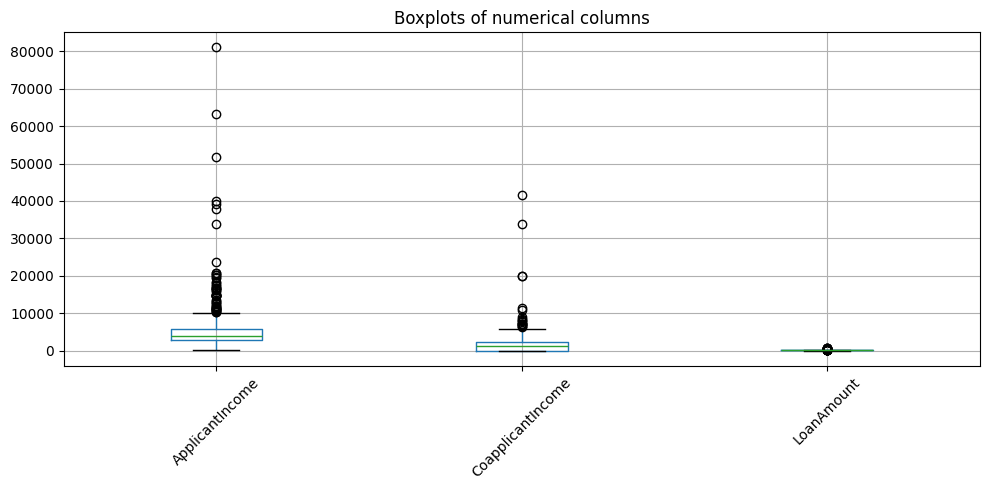

In [57]:
# Quick boxplot visualization for numeric columns
plt.figure(figsize=(10, 5))
train_df_copy[num_cols].boxplot(rot=45)
plt.title("Boxplots of numerical columns")
plt.tight_layout()
plt.show()

In [58]:
# IQR Capping (Winsorization)
for col in num_cols:
    Q1 = train_df_copy[col].quantile(0.25)
    Q3 = train_df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    
    # Cap values outside the bounds
    train_df_copy[col] = np.where(train_df_copy[col] < lower, lower,
                     np.where(train_df_copy[col] > upper, upper, train_df_copy[col]))

In [59]:
# IQR-based check AFTER capping
iqr_out_counts_new = {}
for col in num_cols:
    Q1 = train_df_copy[col].quantile(0.25)
    Q3 = train_df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    iqr_out_counts_new[col] = ((train_df_copy[col] < lower) | (train_df_copy[col] > upper)).sum()

iqr_out_counts_new = pd.Series(iqr_out_counts_new)
print("\nOutlier counts by column AFTER capping (IQR rule):")
print(iqr_out_counts_new[iqr_out_counts_new > 0] if iqr_out_counts_new.sum() > 0 else "No IQR outliers detected")


Outlier counts by column AFTER capping (IQR rule):
No IQR outliers detected


In [60]:
# Compare with previous IQR counts if available
if 'iqr_out_counts' in globals():
    compare_iqr = pd.concat(
        [iqr_out_counts.rename('before'), iqr_out_counts_new.rename('after')],
        axis=1
    )
    print("\nComparison of IQR outlier counts (before vs after capping):")
    display(compare_iqr)
else:
    print("No previous IQR outlier counts found.")


Comparison of IQR outlier counts (before vs after capping):


,before,after
ApplicantIncome,50,0
CoapplicantIncome,18,0
LoanAmount,41,0


In [61]:
train_df_copy['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [62]:
train_df_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


**Phase 2: Exploratory Data Analysis (EDA)**

In [63]:
# Task 2.1: Conduct descriptive statistics to summarize the key characteristics of the data.
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [64]:
stats = pd.DataFrame({
    "Mean": train_df_copy[num_cols].mean().round(2),
    "Median": train_df_copy[num_cols].median().round(2),
    "Mode": train_df_copy[num_cols].mode().iloc[0].round(2),      # mode +may return multiple, take first
    "Variance": train_df_copy[num_cols].var().round(2),
    "Std Dev": train_df_copy[num_cols].std().round(2),
    "Maximum": train_df_copy[num_cols].max().round(2),
    "Minimum": train_df_copy[num_cols].min().round(2),
    "Range": (np.subtract(train_df_copy[num_cols].max(), train_df_copy[num_cols].min())).round(2),
    "25th %ile": train_df_copy[num_cols].quantile(0.25).round(2),
    "50th %ile": train_df_copy[num_cols].quantile(0.50).round(2),
    "75th %ile": train_df_copy[num_cols].quantile(0.75).round(2),
    "IQR": (np.subtract(train_df_copy[num_cols].quantile(0.75), train_df_copy[num_cols].quantile(0.25))).round(2),
    "Skewness": train_df_copy[num_cols].skew().round(2),
    "Kurtosis": train_df_copy[num_cols].kurtosis().round(2)
})

stats.T

,ApplicantIncome,CoapplicantIncome,LoanAmount
Mean,4617.11,1419.70,137.37
Median,3812.50,1188.50,128.00
Mode,10171.25,0.00,261.50
Variance,6149664.60,2639344.31,3111.38
Std Dev,2479.85,1624.61,55.78
Maximum,10171.25,5743.12,261.50
Minimum,150.00,0.00,9.00
Range,10021.25,5743.12,252.50
25th %ile,2877.50,0.00,100.25
50th %ile,3812.50,1188.50,128.00


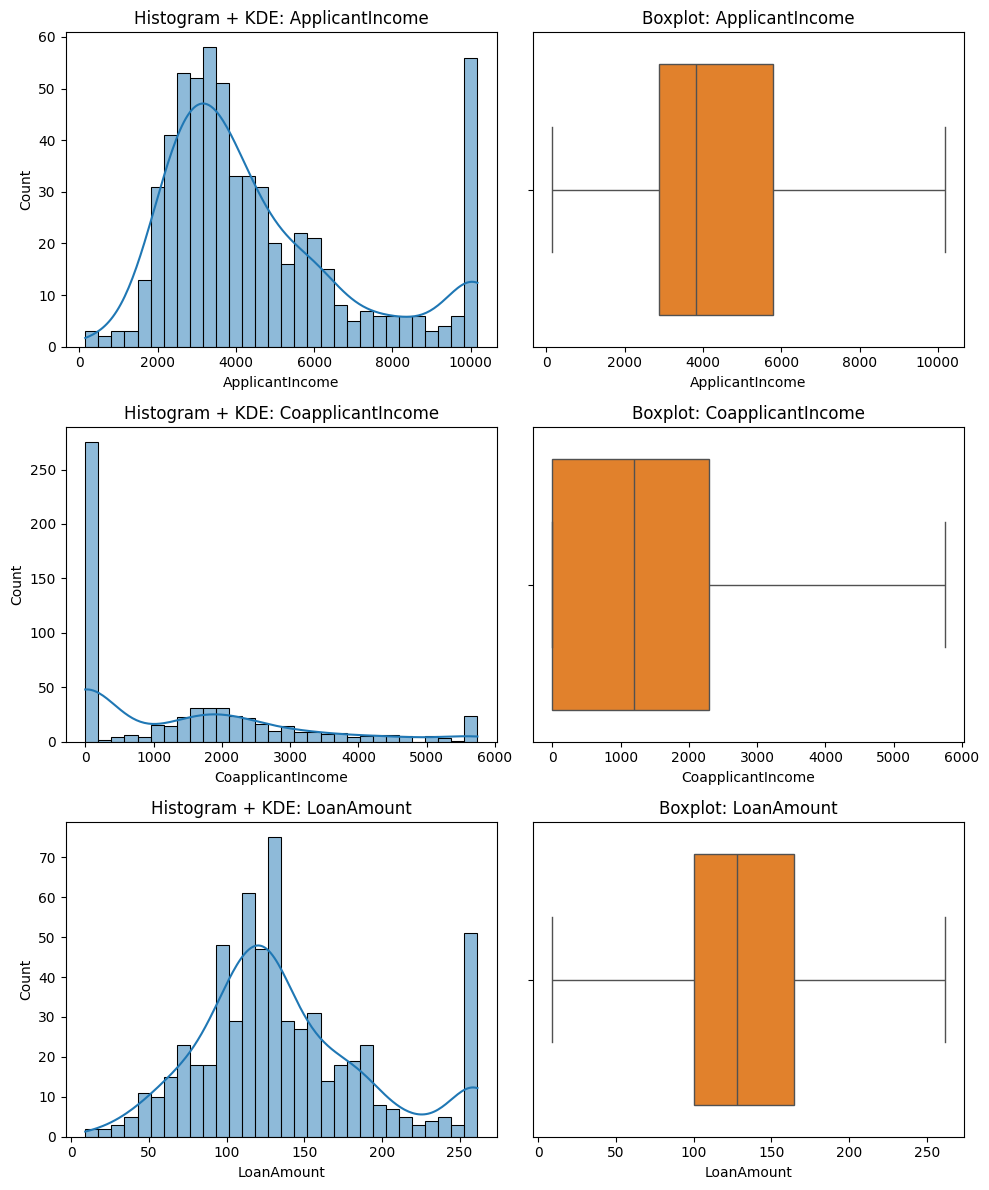

In [65]:
# Task 2.2: Visualize distributions of numerical features (e.g., applicant income, loan amount) using histograms and box plots.

cols = num_cols  # ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig, axes = plt.subplots(nrows=len(cols), ncols=2, figsize=(10, 4 * len(cols)))

for i, col in enumerate(cols):
    ax_hist = axes[i, 0]
    sns.histplot(train_df_copy[col], kde=True, bins=30, ax=ax_hist, color='C0')
    ax_hist.set_title(f'Histogram + KDE: {col}')
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Count')

    ax_box = axes[i, 1]
    sns.boxplot(x=train_df_copy[col], ax=ax_box, color='C1')
    ax_box.set_title(f'Boxplot: {col}')
    ax_box.set_xlabel(col)

plt.tight_layout()
plt.show()

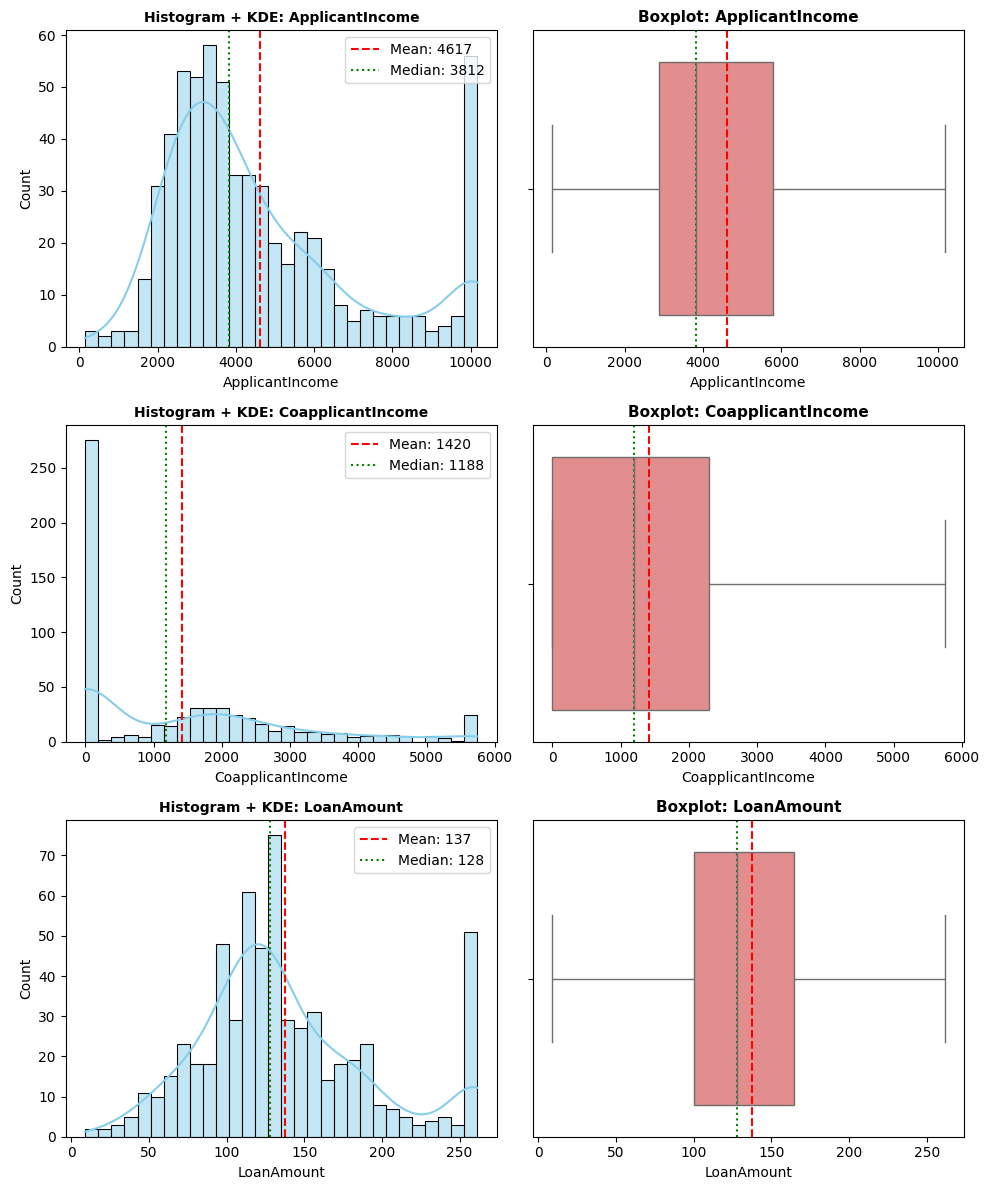

In [66]:
cols = num_cols  # ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig, axes = plt.subplots(nrows=len(cols), ncols=2, figsize=(10, 4 * len(cols)))

for i, col in enumerate(cols):
    data = train_df_copy[col]
    mean_val = data.mean()
    median_val = data.median()

    # Histogram + KDE
    ax_hist = axes[i, 0]
    sns.histplot(data, kde=True, bins=30, ax=ax_hist, color='skyblue')
    
    # Add mean & median lines
    ax_hist.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.0f}')
    ax_hist.axvline(median_val, color='green', linestyle=':', linewidth=1.5, label=f'Median: {median_val:.0f}')
    
    # Add labels and legend
    ax_hist.set_title(f'Histogram + KDE: {col}', fontsize=10, weight='bold')
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Count')
    ax_hist.legend()

    # Boxplot
    ax_box = axes[i, 1]
    sns.boxplot(x=data, ax=ax_box, color='lightcoral')

    # Add mean & median lines
    ax_box.axvline(mean_val, color='red', linestyle='--', linewidth=1.5)
    ax_box.axvline(median_val, color='green', linestyle=':', linewidth=1.5)
    
    ax_box.set_title(f'Boxplot: {col}', fontsize=11, weight='bold')
    ax_box.set_xlabel(col)

plt.tight_layout()
plt.show()

1. ApplicantIncome
Distribution: Positively skewed (right-skewed). Most applicants earn between 2,000–6,000, with a few earning up to 10,000.

Mean vs Median:

Mean ≈ 4,617

Median ≈ 3,812

Since the mean > median, this confirms a right-skewed distribution, meaning a small number of very high incomes pull the mean upward.

Boxplot Insight:

Shows several outliers (high-income applicants).

Most applicants cluster around the lower to mid-income range.

2. CoapplicantIncome
Distribution: Strongly right-skewed with a large number of zeros or near-zero incomes — many applicants likely did not have coapplicants contributing income.

Mean vs Median:

Mean ≈ 1,420

Median ≈ 1,188

The difference is smaller than ApplicantIncome but still right-skewed.

Boxplot Insight:

Very long right whisker and several outliers.

Majority of values are concentrated toward the lower end (below 2,000).

3. LoanAmount
Distribution: Approximately normal (slightly right-skewed).

Most loans are between 100–200.

There are a few high-value outliers.

Mean vs Median:

Mean ≈ 137

Median ≈ 128

Close values indicate a relatively symmetric distribution.

Boxplot Insight:

Fewer extreme outliers compared to income variables.

The data spread looks moderate.

Overall Interpretation
Both ApplicantIncome and CoapplicantIncome show right-skewness, suggesting income inequality — a few applicants earn much more than most.

LoanAmount is comparatively balanced, implying loans are generally distributed around a central value.

Outliers in income might significantly affect regression-based models (e.g., predicting loan approval or amount). It may be beneficial to apply log transformation or scaling before modeling.

Median values better represent the typical applicant’s situation than means in this dataset.

Summary of Numerical Data Distributions
The visual analysis of the numerical variables — ApplicantIncome, CoapplicantIncome, and LoanAmount — provides important insights into their distributions and central tendencies.

The ApplicantIncome distribution is noticeably right-skewed, indicating that while most applicants earn between 2,000 and 6,000, a few individuals have significantly higher incomes that increase the mean (≈ 4,617) compared to the median (≈ 3,812). Similarly, CoapplicantIncome is also highly right-skewed, with many applicants having little or no coapplicant income. The mean (≈ 1,420) is slightly higher than the median (≈ 1,188), reflecting a small group of coapplicants with substantially higher earnings.

In contrast, the LoanAmount variable appears approximately normally distributed, with most loan values concentrated between 100 and 200. Its mean (≈ 137) and median (≈ 128) are quite close, indicating a balanced distribution with only a few high-value outliers.

Overall, the analysis reveals that the income variables contain significant positive skewness and outliers, which may influence model performance if not properly treated. Transformations such as log-scaling or outlier capping may be useful before applying predictive modeling techniques. The LoanAmount variable, however, demonstrates a relatively stable and symmetric pattern suitable for further analysis.

In [67]:
train_df_copy.to_csv("clean_train_home_loan.csv")

In [84]:
categorical_cols = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

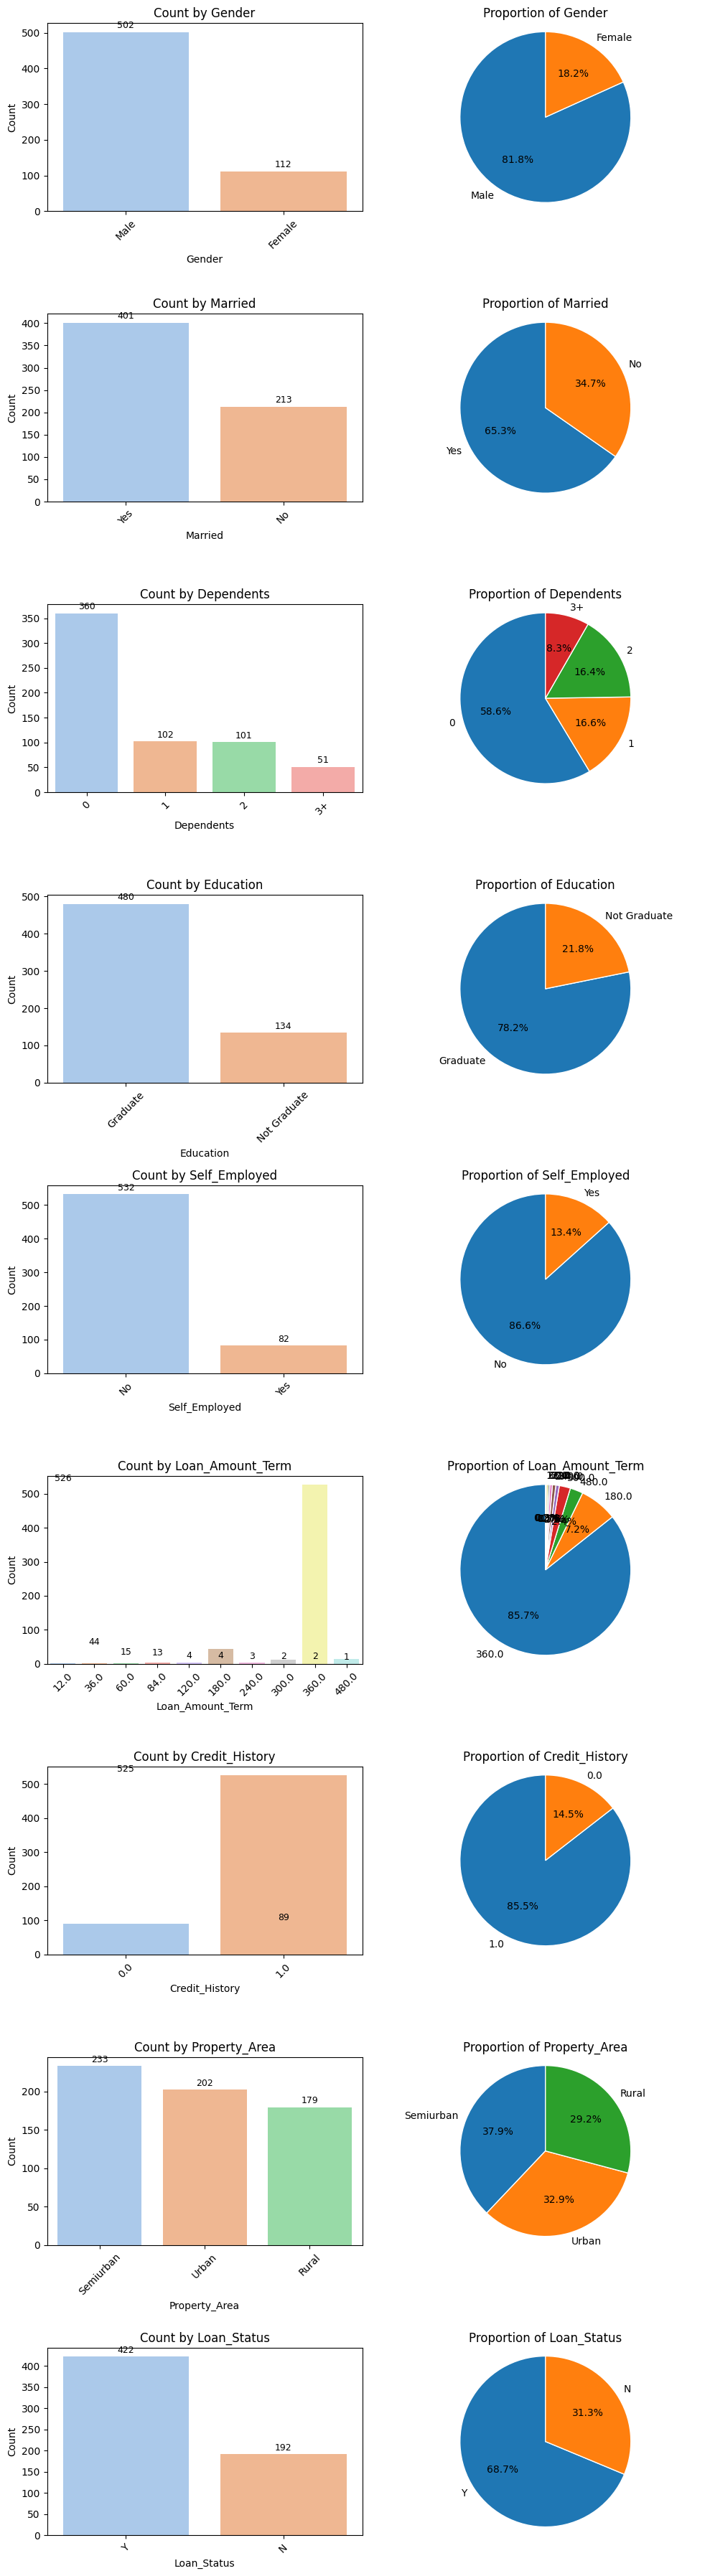

In [85]:
# Task 2.3: Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts.

categorical_to_plot = [c for c in categorical_cols if c != 'Loan_ID']  # reuse existing cat_cols, skip Loan_ID
n = len(categorical_to_plot)
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(10, 4 * n))

# ensure axes is 2D for consistent indexing when n == 1
if n == 1:
    axes = np.array([axes])

for i, col in enumerate(categorical_to_plot):
    counts = train_df_copy[col].value_counts()
    # Bar chart (left)
    ax_bar = axes[i, 0]
    sns.barplot(x=counts.index, y=counts.values, palette='pastel', ax=ax_bar)
    ax_bar.set_title(f'Count by {col}')
    ax_bar.set_xlabel(col)
    ax_bar.set_ylabel('Count')
    ax_bar.tick_params(axis='x', rotation=45)
    # annotate bar values
    for j, v in enumerate(counts.values):
        ax_bar.text(j, v + max(counts.values) * 0.01, str(v), ha='center', va='bottom', fontsize=9)

    # Pie chart (right)
    ax_pie = axes[i, 1]
    ax_pie.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(edgecolor='w'))
    ax_pie.set_title(f'Proportion of {col}')
    ax_pie.axis('equal')

plt.tight_layout()
plt.show()

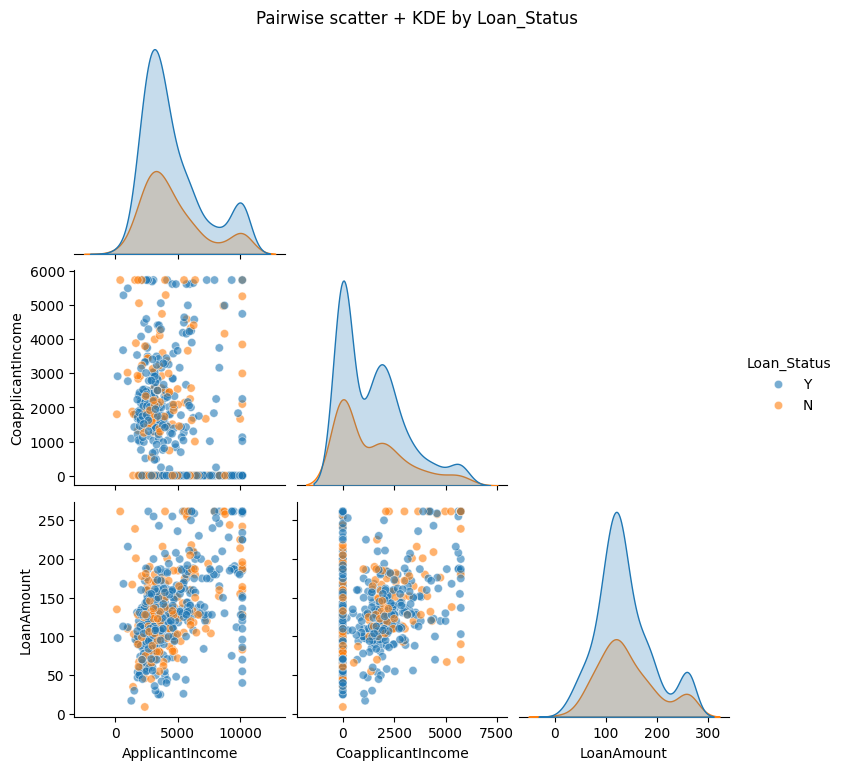

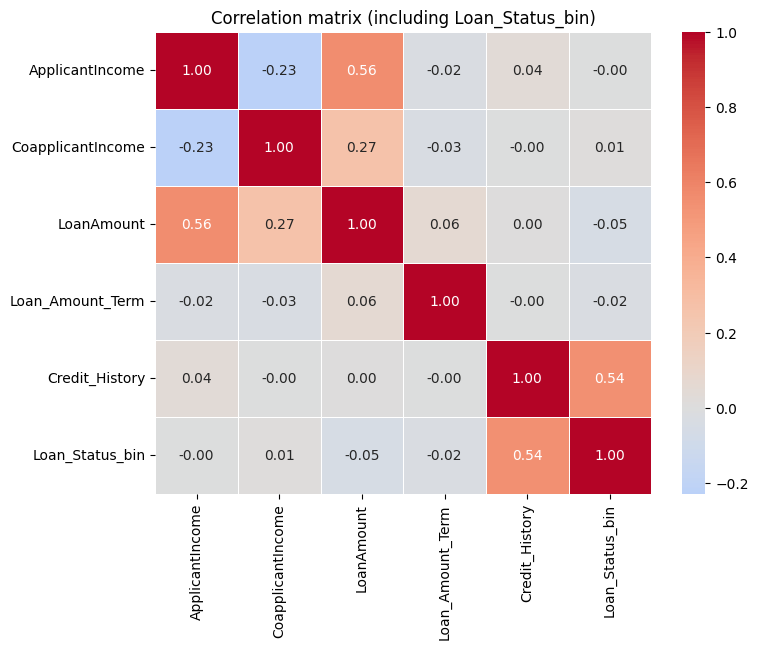

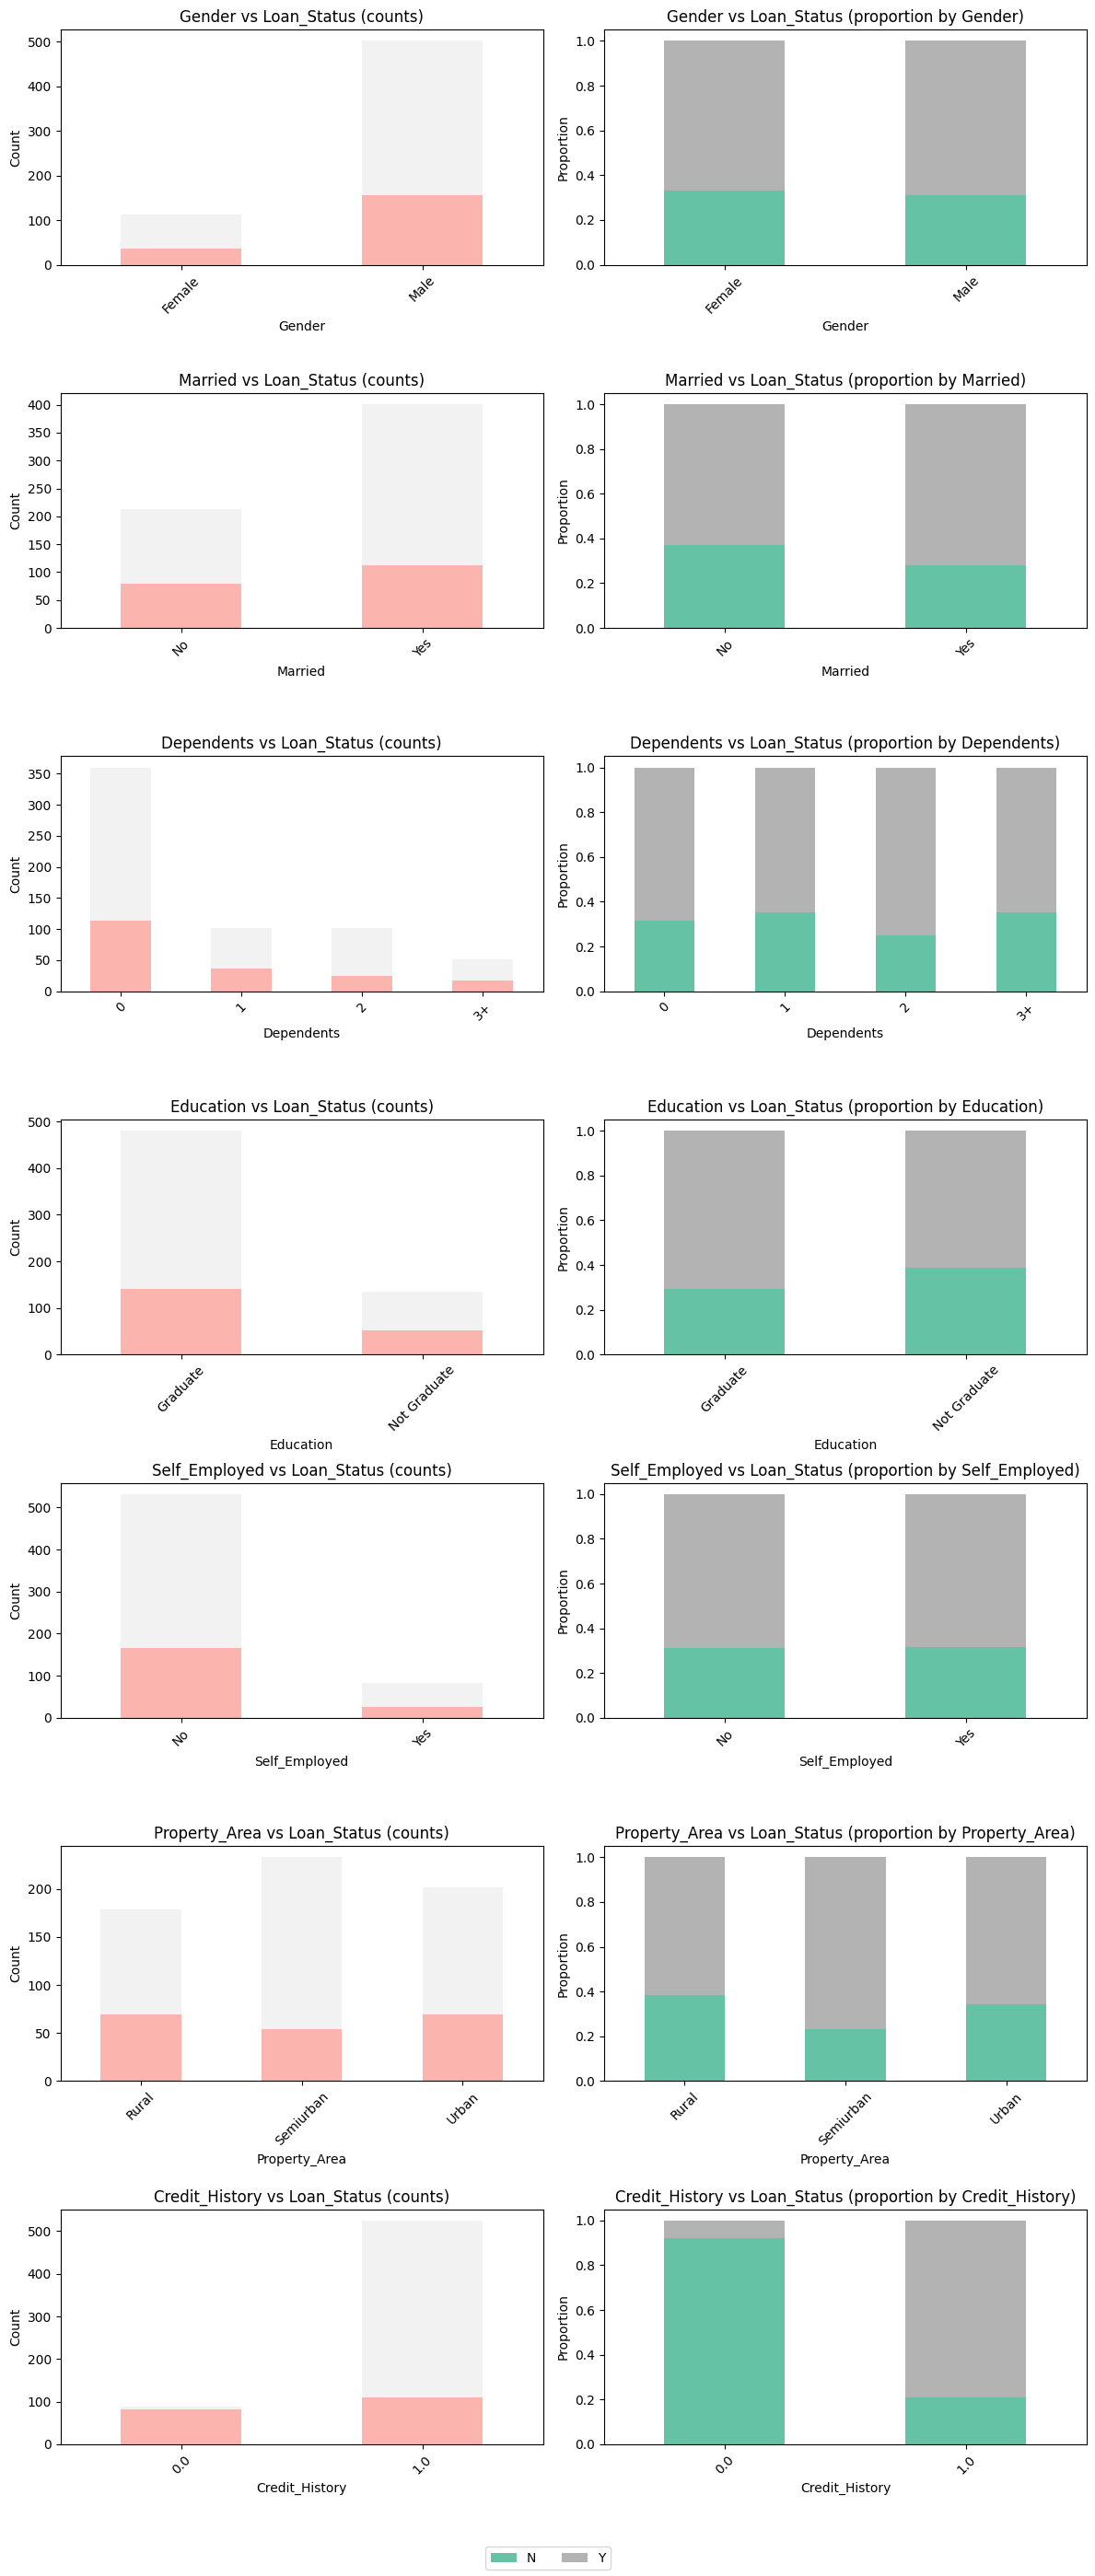


Crosstab counts: Gender vs Loan_Status


Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347



Crosstab proportions (row-normalized): Gender vs Loan_Status


Loan_Status,N,Y
Gender,,
Female,0.330,0.670
Male,0.309,0.691



Crosstab counts: Married vs Loan_Status


Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288



Crosstab proportions (row-normalized): Married vs Loan_Status


Loan_Status,N,Y
Married,,
No,0.371,0.629
Yes,0.282,0.718



Crosstab counts: Dependents vs Loan_Status


Loan_Status,N,Y
Dependents,,
0,113,247
1,36,66
2,25,76
3+,18,33



Crosstab proportions (row-normalized): Dependents vs Loan_Status


Loan_Status,N,Y
Dependents,,
0,0.314,0.686
1,0.353,0.647
2,0.248,0.752
3+,0.353,0.647



Crosstab counts: Education vs Loan_Status


Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82



Crosstab proportions (row-normalized): Education vs Loan_Status


Loan_Status,N,Y
Education,,
Graduate,0.292,0.708
Not Graduate,0.388,0.612



Crosstab counts: Self_Employed vs Loan_Status


Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56



Crosstab proportions (row-normalized): Self_Employed vs Loan_Status


Loan_Status,N,Y
Self_Employed,,
No,0.312,0.688
Yes,0.317,0.683



Crosstab counts: Property_Area vs Loan_Status


Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133



Crosstab proportions (row-normalized): Property_Area vs Loan_Status


Loan_Status,N,Y
Property_Area,,
Rural,0.385,0.615
Semiurban,0.232,0.768
Urban,0.342,0.658



Crosstab counts: Credit_History vs Loan_Status


Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415



Crosstab proportions (row-normalized): Credit_History vs Loan_Status


Loan_Status,N,Y
Credit_History,,
0.0,0.921,0.079
1.0,0.210,0.790


In [86]:
# Task 2.4: Examine relationships between features and the target variable (loan approval status) using scatter plots, correlation matrices, and cross-tabulations.

# Scatter / pairwise plots colored by Loan_Status
sns.pairplot(train_df_copy[cols + ['Loan_Status']], hue='Loan_Status', diag_kind='kde', corner=True, plot_kws={'alpha':0.6})
plt.suptitle("Pairwise scatter + KDE by Loan_Status", y=1.02)
plt.show()

# Correlation matrix including a binary encoding of Loan_Status
corr_df = train_df_copy.select_dtypes(include=[np.number]).copy()
corr_df['Loan_Status_bin'] = train_df_copy['Loan_Status'].map({'Y': 1, 'N': 0})
corr = corr_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation matrix (including Loan_Status_bin)")
plt.show()

# Cross-tabulations and stacked bar plots for key categorical features vs Loan_Status
cat_for_crosstab = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

fig, axes = plt.subplots(nrows=len(cat_for_crosstab), ncols=2, figsize=(12, 4 * len(cat_for_crosstab)))
for i, col in enumerate(cat_for_crosstab):
    # counts
    ct_counts = pd.crosstab(train_df_copy[col].astype(str), train_df_copy['Loan_Status'])
    ct_props = pd.crosstab(train_df_copy[col].astype(str), train_df_copy['Loan_Status'], normalize='index')

    # left: absolute counts
    ax0 = axes[i, 0]
    ct_counts.plot(kind='bar', stacked=True, ax=ax0, colormap='Pastel1', legend=False)
    ax0.set_title(f'{col} vs Loan_Status (counts)')
    ax0.set_ylabel('Count')
    ax0.tick_params(axis='x', rotation=45)

    # right: proportions
    ax1 = axes[i, 1]
    ct_props.plot(kind='bar', stacked=True, ax=ax1, colormap='Set2', legend=False)
    ax1.set_title(f'{col} vs Loan_Status (proportion by {col})')
    ax1.set_ylabel('Proportion')
    ax1.tick_params(axis='x', rotation=45)

plt.tight_layout()
# put a single legend below the plots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2)
plt.subplots_adjust(bottom=0.05)
plt.show()

# Print a few key cross-tab tables for quick inspection
for col in cat_for_crosstab:
    print(f"\nCrosstab counts: {col} vs Loan_Status")
    display(pd.crosstab(train_df_copy[col].astype(str), train_df_copy['Loan_Status']))
    print(f"\nCrosstab proportions (row-normalized): {col} vs Loan_Status")
    display(pd.crosstab(train_df_copy[col].astype(str), train_df_copy['Loan_Status'], normalize='index').round(3))

Overall: 422/614 approved (68.7%)

Numeric correlations with Loan_Status (binary):
Loan_Status_bin      1.000
Credit_History       0.541
CoapplicantIncome    0.012
ApplicantIncome     -0.000
Loan_Amount_Term    -0.023
LoanAmount          -0.047
Name: Loan_Status_bin, dtype: float64

Approval proportions by Credit_History:


Loan_Status,N,Y
Credit_History,,
0,0.921,0.079
1,0.210,0.790



Approval proportions by Property_Area:


Loan_Status,N,Y
Property_Area,,
Rural,0.385,0.615
Semiurban,0.232,0.768
Urban,0.342,0.658



Approval proportions by Education:


Loan_Status,N,Y
Education,,
Graduate,0.292,0.708
Not Graduate,0.388,0.612



Min Loan: 9.0
Max Loan: 261.5
Approval proportions by ApplicantIncome bin:


Loan_Status,N,Y
Income_bin,,
Low,0.312,0.688
Med-Low,0.314,0.686
Med-High,0.307,0.693
High,0.318,0.682


Approval proportions by LoanAmount bin:


Loan_Status,N,Y
Loan_bin,,
<=100,0.305,0.695
101-200,0.300,0.700
201-300,0.388,0.612


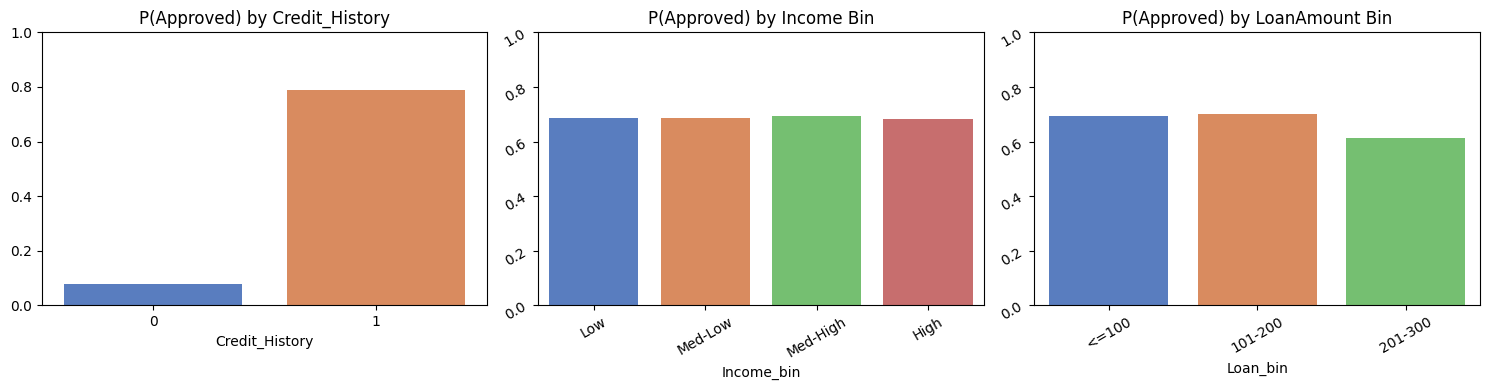

Rows with extreme LoanAmount (above upper IQR bound):


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


Rows where CoapplicantIncome >> ApplicantIncome (ratio > 10):


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
216,LP001722,Male,Yes,0,Graduate,No,150.0,1800.000,135.0,360.0,1.0,Rural,N
468,LP002502,Female,Yes,2,Not Graduate,No,210.0,2917.000,98.0,360.0,1.0,Semiurban,Y
600,LP002949,Female,No,3+,Graduate,No,416.0,5743.125,261.5,180.0,1.0,Urban,N


Rows identified as IQR outliers before capping (sample):


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841.0,10968.0,349.0,360.0,1.0,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073.0,8106.0,200.0,360.0,1.0,Urban,Y
21,LP001046,Male,Yes,1,Graduate,No,5955.0,5625.0,315.0,360.0,1.0,Urban,Y
34,LP001100,Male,No,3+,Graduate,No,12500.0,3000.0,320.0,360.0,1.0,Rural,N



Suggested focus based on above:
- Credit_History is the strongest positive predictor of approval.
- Higher applicant income tends to increase approval probability, but not strictly linear.
- Very large LoanAmount or very high coapplicant incomes are anomalies to inspect case-by-case.
- Property area and education show actionable differences in approval proportions.


In [87]:
# Task 2.5: Identify trends, anomalies, and patterns that could impact loan outcomes.
# Quick trend & anomaly summary to surface patterns affecting Loan_Status

# Overall approval rate
total = len(train_df_copy)
approved = (train_df_copy['Loan_Status'] == 'Y').sum()
print(f"Overall: {approved}/{total} approved ({approved/total:.1%})\n")

# Correlations with Loan_Status (numeric)
print("Numeric correlations with Loan_Status (binary):")
print(corr['Loan_Status_bin'].sort_values(ascending=False).round(3))
print()

# Approval rate by Credit_History (strong predictor)
ch = pd.crosstab(train_df_copy['Credit_History'].astype(int), train_df_copy['Loan_Status'], normalize='index').round(3)
print("Approval proportions by Credit_History:")
display(ch)
print()

# Approval rate by Property_Area and Education (two important categoricals)
for col in ['Property_Area', 'Education']:
    prop = pd.crosstab(train_df_copy[col], train_df_copy['Loan_Status'], normalize='index').round(3)
    print(f"Approval proportions by {col}:")
    display(prop)
    print()

# Create bins for ApplicantIncome and LoanAmount and compute approval rates
df_tmp = train_df_copy.copy()
df_tmp['Income_bin'] = pd.qcut(df_tmp['ApplicantIncome'], q=4, labels=['Low','Med-Low','Med-High','High'])

# Ensure bins are monotonically increasing by getting the actual min and max
min_loan = df_tmp['LoanAmount'].min()
max_loan = df_tmp['LoanAmount'].max()

print("Min Loan:", min_loan)
print("Max Loan:", max_loan)

# Create monotonically increasing bins
df_tmp['Loan_bin'] = pd.cut(df_tmp['LoanAmount'], 
                           bins=[min_loan-1, 100, 200, 300, max(max_loan, 301)], 
                           labels=['<=100','101-200','201-300','>300'])

income_ct = pd.crosstab(df_tmp['Income_bin'], df_tmp['Loan_Status'], normalize='index').round(3)
loan_ct = pd.crosstab(df_tmp['Loan_bin'], df_tmp['Loan_Status'], normalize='index').round(3)

print("Approval proportions by ApplicantIncome bin:")
display(income_ct)
print("Approval proportions by LoanAmount bin:")
display(loan_ct)
print()

# Visual summary (compact)
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.barplot(x=ch.index.astype(str), y=ch['Y'].values, ax=axes[0], palette='muted')
axes[0].set_title('P(Approved) by Credit_History'); axes[0].set_ylim(0,1)

sns.barplot(x=income_ct.index.astype(str), y=income_ct['Y'].values, ax=axes[1], palette='muted')
axes[1].set_title('P(Approved) by Income Bin'); axes[1].set_ylim(0,1); axes[1].tick_params(rotation=30)

sns.barplot(x=loan_ct.index.astype(str), y=loan_ct['Y'].values, ax=axes[2], palette='muted')
axes[2].set_title('P(Approved) by LoanAmount Bin'); axes[2].set_ylim(0,1); axes[2].tick_params(rotation=30)

plt.tight_layout()
plt.show()

# Anomaly detection: show rows with unusual relationships
print("Rows with extreme LoanAmount (above upper IQR bound):")
display(train_df_copy[train_df_copy['LoanAmount'] > upper].sort_values('LoanAmount', ascending=False).head(10))

print("Rows where CoapplicantIncome >> ApplicantIncome (ratio > 10):")
mask_ratio = train_df_copy['CoapplicantIncome'] / (train_df_copy['ApplicantIncome'] + 1e-9) > 10
display(train_df_copy[mask_ratio].head())

print("Rows identified as IQR outliers before capping (sample):")
display(rows_with_iqr_outliers.head())

# Top factors to investigate further
print("\nSuggested focus based on above:")
print("- Credit_History is the strongest positive predictor of approval.")
print("- Higher applicant income tends to increase approval probability, but not strictly linear.")
print("- Very large LoanAmount or very high coapplicant incomes are anomalies to inspect case-by-case.")
print("- Property area and education show actionable differences in approval proportions.")

### **EDA REPORT**

### **Home Loan Analysis: Exploratory Data Analysis (EDA) Report**

**1. Methodology**

**1.1 Data Collection and Overview**
The dataset used in this analysis contains records of home loan applications, capturing a wide range of applicant characteristics, including demographic details, financial indicators, and loan-specific attributes.
 Data was imported from a remote repository and carefully examined to understand its structure and completeness. The dataset initially comprised multiple columns, including both categorical and numerical variables such as ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History, Gender, Education, Property_Area, and Loan_Status (the target variable).
A preliminary data audit revealed the presence of missing values, outliers, and skewed distributions, which necessitated several preprocessing steps before performing a detailed analysis.

**1.2 Data Cleaning and Preparation**

Handling Missing Values:
Numerical Variables: Missing values in numerical features were imputed using median values, as medians are less sensitive to extreme outliers and ensure stable central tendency representation.


Categorical Variables: Missing categorical data were imputed with the mode (most frequent category) to maintain the variable’s overall distribution.


Verification: Missing value counts were recorded both before and after imputation to ensure that no unhandled gaps remained.
Outlier Treatment:
The Interquartile Range (IQR) method was used to detect potential outliers in numerical features.


For extreme values that could distort model performance, Winsorization was applied to cap outliers at acceptable thresholds.


Primary variables treated included ApplicantIncome, CoapplicantIncome, and LoanAmount, where significant deviations were noted.

**1.3 Analysis Framework**

The EDA followed a structured approach combining both univariate and bivariate analyses:
Descriptive Statistics: Measures such as mean, median, standard deviation, and skewness were computed for all numerical features to understand central tendencies and variability.


Distributional Analysis: Histograms, boxplots, and density plots were utilized to visualize data spread and detect skewness or outliers.


Categorical Analysis: Frequency counts and proportion plots were employed to understand categorical variable distributions.


Relationship Analysis: Relationships between independent variables and the target variable (Loan_Status) were examined through cross-tabulations and grouped summary statistics.
This systematic approach ensured comprehensive insight into both individual and inter-variable behaviors.

**2. Key Analysis Results**

**2.1 Numerical Variables**

Applicant Income
Mean: 4,617


Median: 3,812


Distribution: Highly right-skewed, with a long tail of higher incomes.


Observations: A small subset of applicants reported exceptionally high incomes, introducing mild outlier effects. Despite this, median income provides a more realistic central estimate for typical applicants.
Coapplicant Income
Mean: 1,420


Median: 1,188


Distribution: Strongly right-skewed, with numerous instances of zero income values.
Interpretation: Many applicants apply individually, explaining the zero-income entries for coapplicants. Among those with coapplicants, income levels vary widely.
Loan Amount
Mean: 137


Median: 128


Distribution: Approximately normal, indicating relative consistency in requested loan sizes.


Outliers: Present but moderate in influence, suggesting a stable loan amount trend for most applicants.

**2.2 Categorical Variables**

Credit History
Key Predictor: Demonstrated as the strongest determinant of loan approval outcomes.


Applicants with a good credit history had an approval rate of around 80%, while those with poor credit saw approval rates drop drastically to about 15%.


Interpretation: This pattern confirms that credit reliability is a critical component in risk-based lending assessments.
Property Area
Semi-Urban: Exhibited the highest loan approval rates, indicating stronger applicant profiles or better repayment records.


Urban: Recorded moderate approval rates, slightly below semi-urban areas.


Rural: Demonstrated lowest approval rates, potentially linked to lower income levels or limited financial access.


Conclusion: Geographic location plays a tangible role in lending outcomes, possibly due to socio-economic variations across regions.
Education and Employment
Education: Graduates tend to have higher approval rates, aligning with their generally higher income profiles and perceived job stability.


Employment: Self-employed individuals display lower approval rates, suggesting that lenders associate self-employment with income variability and higher perceived risk.

**3. Recommendations**

**3.1 Areas for Further Investigation**

Credit History Deep Dive:
 Conduct a more granular analysis of credit score ranges and default histories to identify exceptions—cases where applicants with good credit were still rejected.

Income–Loan Relationship:
 Examine income-to-loan amount ratios to understand thresholds that maximize approval chances. Evaluate whether coapplicant income significantly improves loan eligibility.

Geographical Disparities:
 Investigate socio-economic factors driving the differences in approval rates between rural, urban, and semi-urban applicants. Regional income distribution and employment stability could explain these gaps.
3.2 Model Development Recommendations
Feature Engineering:
Construct derived variables such as Income-to-Loan Ratio, Total Family Income, and Credit Score Composite.

Generate property-area-based risk scores to capture geographic lending trends.
Data Preprocessing:
Apply log transformations to right-skewed income variables to normalize distributions.

Use standardization or normalization for continuous features to improve model convergence.

Encode categorical variables using one-hot encoding or label encoding, depending on algorithm requirements.
Modeling Strategy:
Implement balanced class techniques (e.g., SMOTE, class weights) to address potential approval-status imbalances.

Apply cross-validation to make sure the model performs well on different parts of the data.
Conclusion
The exploratory analysis underscores the dominant role of credit history in determining loan approval outcomes, supported by the influence of income levels, employment type, and geographical factors. These insights form a strong foundation for building predictive models and guiding data-driven lending strategies that balance business growth with risk mitigation.


# **BASELINE MODEL BEFORE PREPROCESSING**

The baseline shows how the raw data perform "as is it"
- This becomes your refernce point --- after preprocessing, scaling, and feature engineering, we can measure improvement quantitatively.
- If the model performs poorly or throws errors, it signals missing values, incosistent types, or extreme skew/outliers.
- The coefficients or features importances in the baseline model help you to which features already have predictive power. then we can focus preprocessing on the weaker or noisier vartiable.

In [88]:
train_df_copy.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
train_df_copy['']

In [91]:
# split the data

y = train_df_copy["Loan_Status"]
x = train_df_copy.drop(columns=['Loan_Status'])

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=234)

In [92]:
# lets use logistic regression algorithm to train our base model

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=234, max_iter=10)
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'LP001581'